In [610]:
# import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


In [611]:
import warnings
# ignores (suppresses) all warnings raised during the execution of your Python code.
warnings.filterwarnings('ignore')

In [612]:
ini_train_set = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\titanic\train.csv')
test_set = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\titanic\test.csv')
Y_test = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\titanic\gender_submission.csv')

In [613]:
ini_train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [614]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [615]:
ini_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [616]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [617]:
ini_train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [618]:
#training data shape
ini_train_set.shape

(891, 12)

In [619]:
#test data shape
test_set.shape

(418, 11)

In [620]:
#drop cabin and ticket from the training data set
ini_train_set.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [621]:
#drop cabin and ticket from the test data set
test_set.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [622]:
#groups the DataFrame ini_train_set by the 'Pclass' column and then calculates the mean of the 'Survived' column for each group. 
ini_train_set.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [623]:
#groups the DataFrame ini_train_set by the 'Sex' column and then calculates the mean of the 'Survived' column for each group. 
ini_train_set.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [624]:
#groups the DataFrame ini_train_set by the 'SibSp' column and then calculates the mean of the 'Survived' column for each group. 
ini_train_set.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [625]:
#groups the DataFrame ini_train_set by the 'Parch' column and then calculates the mean of the 'Survived' column for each group. 
ini_train_set.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [626]:
#groups the DataFrame ini_train_set by the 'Embarked' column and then calculates the mean of the 'Survived' column for each group. 
ini_train_set.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


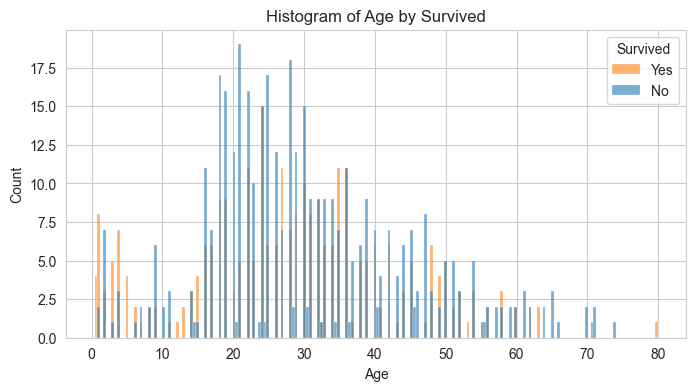

In [627]:
# Age histogram grouped by Survive 
# Set the style of the visualization
sns.set_style('whitegrid')

# Create a histogram of the 'Age' variable split by 'Survived'
plt.figure(figsize=(8, 4))
sns.histplot(data=ini_train_set, x='Age', hue='Survived', bins=200, alpha=0.6)
plt.title('Histogram of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()


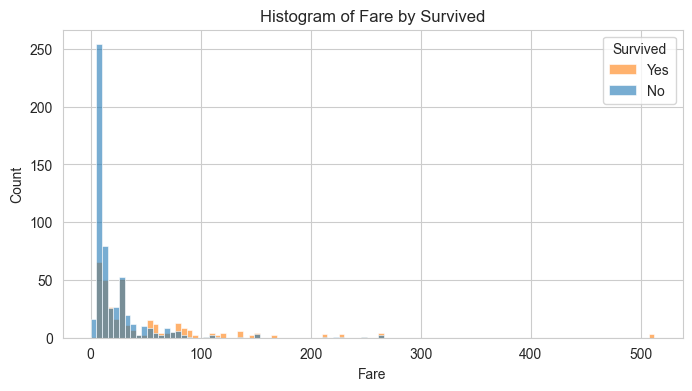

In [628]:
# Age histogram grouped by Survive 
# Set the style of the visualization
sns.set_style('whitegrid')

# Create a histogram of the 'Age' variable split by 'Survived'
plt.figure(figsize=(8, 4))
sns.histplot(data=ini_train_set, x='Fare', hue='Survived', bins=100, alpha=0.6)
plt.title('Histogram of Fare by Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()


In [629]:
#no of empty rows w.r.t columns in training set
ini_train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [630]:
#no of empty rows w.r.t columns in test set
test_set.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [631]:
# filling the empty spaces in the age column with the median value of the column
ini_train_set['Age'].fillna(ini_train_set['Age'].median(), inplace=True)

In [632]:
# filling the empty spaces in the embarked column with the mode value of the column
ini_train_set['Embarked'].fillna(ini_train_set['Embarked'].mode()[0], inplace=True)

In [633]:
# filling the empty spaces in the age column with the median value of the column
test_set['Age'].fillna(test_set['Age'].median(), inplace=True)

In [634]:
# filling the empty spaces in the fare column with the median value of the column
test_set['Fare'].fillna(test_set['Fare'].median(), inplace=True)

In [635]:
ini_train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [636]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [637]:
# replacing male with 0 and female with 1 in training set since female survived the most
ini_train_set.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [638]:
# replacing male with 0 and female with 1 in test set since female survived the most
test_set.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [639]:
# replacing the c with 1 and Q with 0 and S with 0 since C has survived more in training set
ini_train_set.replace({'Embarked':{'C':1,'Q':0,'S':0}},inplace=True)


In [640]:
# replacing the c with 1 and Q with 0 and S with 0 since C has survived more in test set
test_set.replace({'Embarked':{'C':1,'Q':0,'S':0}},inplace=True)

In [641]:
# replacing the parch 0,1,2,3,4,5,6 with 0,1,0,1,0,0,0 respectively sice parch 1,3 survived the most in training set
ini_train_set.replace({'Parch': {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0}}, inplace=True)


In [642]:
# replacing the parch 0,1,2,3,4,5,6 with 0,1,0,1,0,0,0 respectively in test set
test_set.replace({'Parch': {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0}}, inplace=True)

In [643]:
# repalcing the pclass 1,2,3 with 1,0,0 respectively since pclass 1 survived the most in training set
ini_train_set.replace({'Pclass':{1:1, 2:0, 3:0}},inplace=True)

In [644]:
# replacing the pclass 1,2,3 with 1,0,0 respectively in the test set same as the training set
test_set.replace({'Pclass':{1:1, 2:0, 3:0}},inplace=True)

In [645]:
# replacing sibsp 0,1,2,3,4,5,8 with 0,1,1,0,0,0,0 respectively since sibsp 1,2 survived the most in the training set 
ini_train_set.replace({'SibSp':{0:0,1:1, 2:1, 3:0,4:0,5:0,8:0}},inplace=True)

In [646]:
# replacing sibsp 0,1,2,3,4,5,8 with 0,1,1,0,0,0,0 respectively in the test set same as training set
test_set.replace({'SibSp':{0:0,1:1, 2:1, 3:0,4:0,5:0,8:0}},inplace=True)

In [647]:
# Replace values in the 'Age' column with 1 where the age is less than or equal to 15 or greater than 65 in training set 
ini_train_set.loc[(ini_train_set['Age'] <=15) | (ini_train_set['Age']>=65) ,'Age'] = 1


In [648]:
# Replace values in the 'Age' column with 1 where the age is less than or equal to 15 or greater than 65
test_set.loc[(test_set['Age'] <= 15)| (ini_train_set['Age']>=65), 'Age'] = 1


In [649]:
# repalce values in the age column with 0 if the age is greater than 15
ini_train_set.loc[(ini_train_set['Age'] > 15), 'Age'] = 0

In [650]:
# repalce values in the age column with 0 if the age is greater than 15
test_set.loc[(test_set['Age'] > 15), 'Age'] = 1

In [651]:
print(ini_train_set.Age[11:40])

11    0.0
12    0.0
13    0.0
14    1.0
15    0.0
16    1.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    1.0
23    0.0
24    1.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    1.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    1.0
Name: Age, dtype: float64


In [652]:
# replace the values in the fare column with 0 if the fare is less than 50
ini_train_set.loc[(ini_train_set['Fare'] <50), 'Fare'] = 0

In [653]:
# replace the values in the fare column with 0 if the fare is less than 50
test_set.loc[(test_set['Fare'] < 50), 'Fare'] = 0

In [654]:
# replace the values in the fare column with 1 if the values are greater than equal to 50
ini_train_set.loc[(ini_train_set['Fare'] >=50), 'Fare'] = 1

In [655]:
# replace the values in the fare column with 1 if the values are greater than equal to 50
test_set.loc[(test_set['Fare'] >= 50), 'Fare'] = 1

In [656]:
print(ini_train_set.Fare[1:40])

1     1.0
2     0.0
3     1.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    1.0
28    0.0
29    0.0
30    0.0
31    1.0
32    0.0
33    0.0
34    1.0
35    1.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: Fare, dtype: float64


In [657]:
X_ = ['Sex', 'Embarked', 'Parch', 'Pclass', 'SibSp','Age','Fare']  # List of feature column names
Y = ini_train_set['Survived']  # Target variable
X = ini_train_set[X_]  # Feature variables
X_test = test_set[X_]  # test feature variables

In [658]:
# spliting data into training set and cross validation set
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.01, random_state=42)

In [659]:
# Instantiating a StandardScaler object
scaler = StandardScaler()

# Scaling (standardizing) the features in the training set X_train and fitting the scaler to it
X_train = scaler.fit_transform(X_train)

# Transforming the cross-validation set X_cv using the scaler fitted on the training set
X_cv = scaler.transform(X_cv)

# Transforming the test set X_test using the same scaler
X_test = scaler.transform(X_test)

In [660]:
# Output the shapes of various datasets to check dimensions

# Output the shape of the training set X_train
X_train.shape

# Output the shape of the cross-validation set X_cv
X_cv.shape

# Output the shape of the training labels y_train
y_train.shape

# Output the shape of the cross-validation labels y_cv
y_cv.shape

# Output the shape of the test set X_test
X_test.shape

((882, 7), (9, 7), (882,), (9,), (418, 7))

In [661]:
# Define a Sequential model using Keras API
model = tf.keras.Sequential([
    # First hidden layer with 256 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    # Dropout layer with a dropout rate of 0.5 to prevent overfitting
    
    tf.keras.layers.Dropout(0.5),
    
    # Second hidden layer with 128 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    # Dropout layer with a dropout rate of 0.5
    
    tf.keras.layers.Dropout(0.5),
    
    # Third hidden layer with 64 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    # Dropout layer with a dropout rate of 0.5
    
    tf.keras.layers.Dropout(0.5),
    
    # Fourth hidden layer with 32 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    # Dropout layer with a dropout rate of 0.5
    
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with 1 neuron and sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [662]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',               # Adam optimizer, which is commonly used for training neural networks
    loss='binary_crossentropy',    # Binary cross-entropy loss function for binary classification tasks
    metrics=['accuracy']           # Evaluation metric to monitor during training, accuracy in this case
)


In [669]:
# Train the model on the training data
model.fit(
    X_train,             # Input features (X_train)
    y_train,             # Target labels (y_train)
    epochs=200,          # Number of training epochs (iterations over the entire dataset)
    batch_size=4,        # Number of samples per gradient update
    verbose=1            # Verbosity mode (1: progress bar, 0: silent)
)


Epoch 1/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7706 - loss: 0.5497
Epoch 2/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7822 - loss: 0.5276
Epoch 3/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7740 - loss: 0.5393
Epoch 4/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7871 - loss: 0.5342
Epoch 5/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7933 - loss: 0.5038
Epoch 6/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7889 - loss: 0.5240
Epoch 7/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7893 - loss: 0.5072
Epoch 8/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7788 - loss: 0.5403
Epoch 9/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8102 - loss: 0.5063
Epoch 10/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7749 - loss: 0.5339
Epoch 11/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7609 - loss: 0.5602
Epoch 12/200
221/221 ━━━━━━━━━━━━━━━━━━━━

In [670]:
# Evaluate the model's performance on the cross-validation dataset
loss, accuracy = model.evaluate(X_cv, y_cv, verbose=1)

# Print the test accuracy and test loss
print(f"Test Accuracy: {accuracy}")  # Print the accuracy achieved by the model on the cross-validation set
print(f"Test Loss: {loss}")           # Print the loss value obtained by the model on the cross-validation set


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8889 - loss: 0.5282
Test Accuracy: 0.8888888955116272
Test Loss: 0.528242290019989


In [671]:
# Predict probabilities of survival for the test set using the trained model
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions based on a threshold of 0.8
# If the predicted probability is greater than 0.8, classify as survived (1), otherwise classify as not survived (0)
y_pred = (y_pred > 0.8).astype(int).ravel()

# Shape of the predicted labels array
y_pred.shape


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(418,)

In [683]:
passenger_ids = test_set['PassengerId']
y_pred_df= pd.DataFrame(y_pred, columns=['survived'])
y_pred = y_pred_df['survived']
result = pd.DataFrame({'PassengerId':passenger_ids, 'Survived':y_pred})
print(result)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         0
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         0
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         0
33           925         0
34           926         0
35           927         0
3

In [673]:
# Extract ground truth labels for the test set
y_test = Y_test['Survived']

# Evaluate the model's performance on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print(f"Test Accuracy: {accuracy}")

# Print the test loss
print(f"Test Loss: {loss}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8866 - loss: 0.4296
Test Accuracy: 0.8899521827697754
Test Loss: 0.4306966960430145


In [682]:
# saves the DataFrame result to a CSV file named 'Y_pred.csv'
result.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\titanic\Y_pred.csv', index=False)